In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [2]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
print('we have {} rows in our dataset'.format(train.shape[0]))
print('we have {} columns in our dataset'.format(train.shape[1]))

we have 54808 rows in our dataset
we have 14 columns in our dataset


In [7]:
object_data = train.dtypes[train.dtypes == 'object'].count()

In [8]:
train.dtypes[train.dtypes == 'object'].index

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [9]:
categorical_data = train.dtypes[train.dtypes == 'int64'].count()
contineous_data = train.dtypes[train.dtypes == 'float64'].count()

In [10]:
print('we have {} object data'.format(object_data))
print('we have {} categorical data'.format(categorical_data))
print('we have {} contineous data'.format(contineous_data))

we have 5 object data
we have 8 categorical data
we have 1 contineous data


In [11]:
## checking count plot of object variable

In [12]:
object_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Counts on categorical columns
for feature in object_features:
    print(feature,':')
    print(train[feature].value_counts())
    print('----------------------------')

department :
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
----------------------------
region :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
--

## EXPLANATORY DATA ANALYSIS
since we have 5 object, 8 categorical and 1 contineous variable in our dataset we check plot for each DataType

## for Object Variable

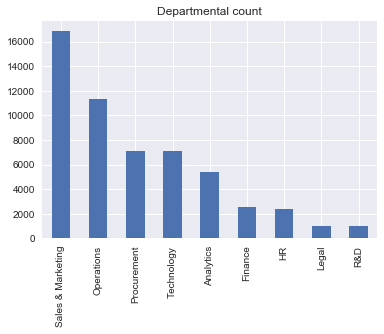

In [13]:
train['department'].value_counts().plot(kind='bar')
plt.title('Departmental count')

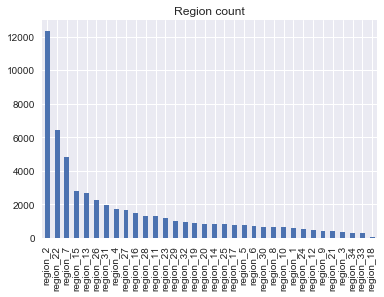

In [14]:
train['region'].value_counts().plot(kind='bar')
plt.title('Region count')

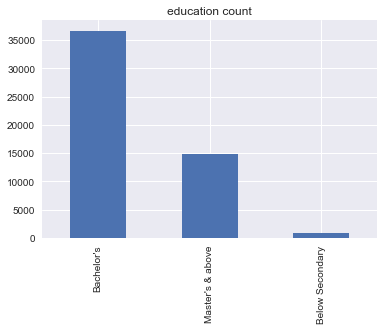

In [15]:
train['education'].value_counts().plot(kind='bar')
plt.title('education count')

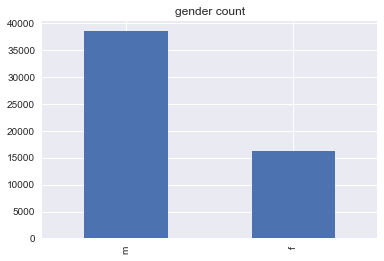

In [16]:
train['gender'].value_counts().plot(kind='bar')
plt.title('gender count')

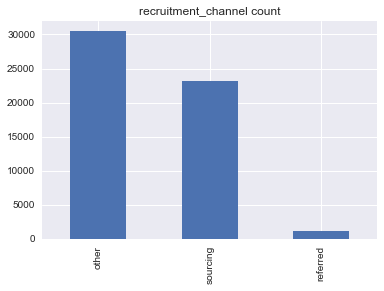

In [17]:
train['recruitment_channel'].value_counts().plot(kind='bar')
plt.title('recruitment_channel count')

## checking the Class of the target variable

In [18]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

## Exploring more
we deal more with the target variable on the object category using seaborn plot

In [19]:
sns.set(rc={'figure.figsize':(10,10)}) ## setting up seaborn plot shape

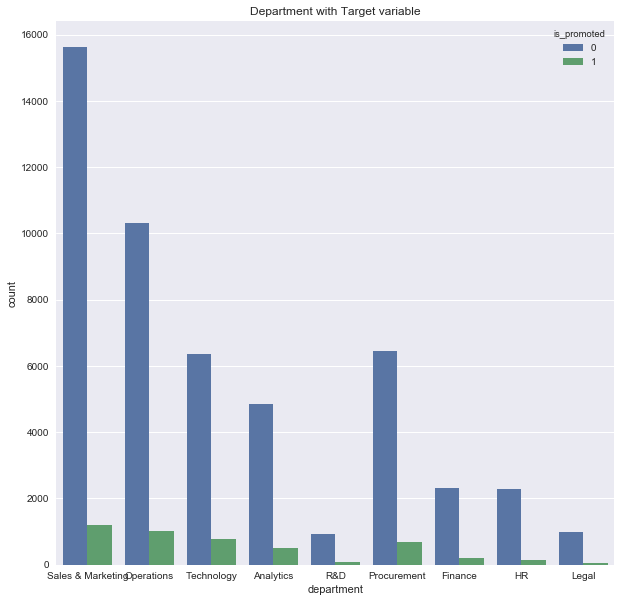

In [20]:
sns.countplot(x='department', hue='is_promoted', data=train)
plt.title('Department with Target variable')

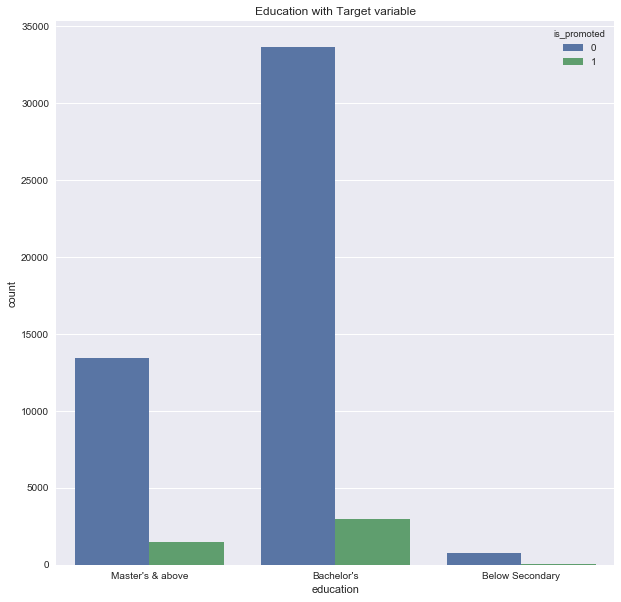

In [21]:
sns.countplot(x='education', hue='is_promoted', data=train)
plt.title('Education with Target variable')

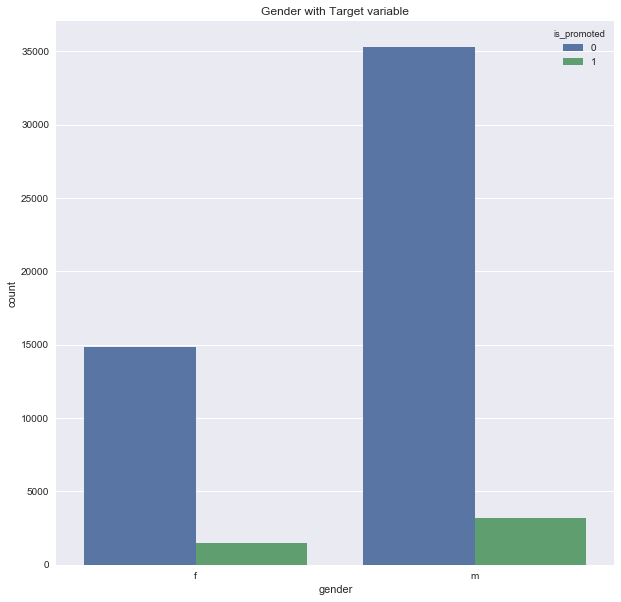

In [22]:
sns.countplot(x='gender', hue='is_promoted', data=train)
plt.title('Gender with Target variable')

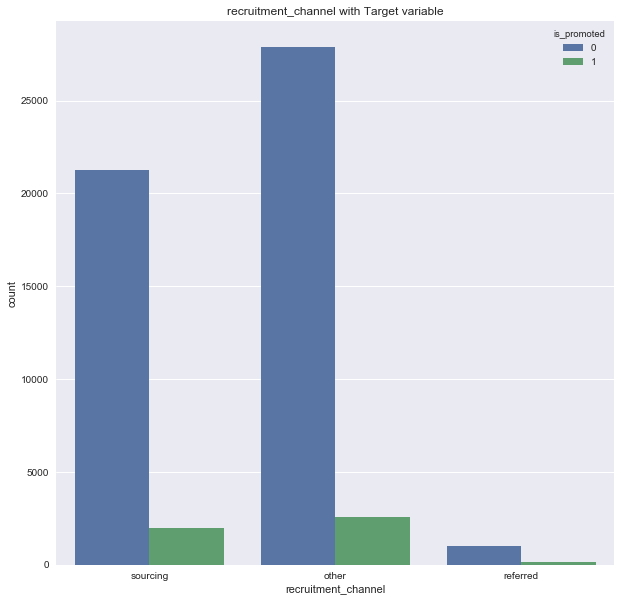

In [23]:
sns.countplot(x='recruitment_channel', hue='is_promoted', data=train)
plt.title('recruitment_channel with Target variable')

## using crosstab
after making using of seaborn countplot we should look at some object variable with crosstab with the target variable to check the numbers
using crosstab is like using Pivot table

In [24]:
# checking through department crosstab with the target variable
pd.crosstab(train['department'], train['is_promoted'], margins=True, normalize='index')

is_promoted,0,1
department,,
Analytics,0.904335,0.095665
Finance,0.918770,0.081230
HR,0.943755,0.056245
Legal,0.948989,0.051011
Operations,0.909852,0.090148
Procurement,0.903614,0.096386
R&D,0.930931,0.069069
Sales & Marketing,0.927969,0.072031
Technology,0.892407,0.107593


In [25]:
# checking through education crosstab with the target variable
pd.crosstab(train['education'], train['is_promoted'], margins=True, normalize='index')

is_promoted,0,1
education,,
Bachelor's,0.917969,0.082031
Below Secondary,0.916770,0.083230
Master's & above,0.901441,0.098559
All,0.913243,0.086757


In [26]:
# checking through gender crosstab with the target variable
pd.crosstab(train['gender'], train['is_promoted'], margins=True, normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151
All,0.914830,0.085170


In [27]:
# checking through recruitment_channel crosstab with the target variable
pd.crosstab(train['recruitment_channel'], train['is_promoted'], margins=True, normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013
All,0.914830,0.085170


## please note
i actually used crosstab with normalize undex for the percentage when 0 == Not promoted and 1 is promoted to balance the figure

## for Categorical Variable
Using Boxplot to make some sense in boxplot we can detect the skewness of some data due to the shape 

In [28]:
train.dtypes[train.dtypes == 'int64'].index

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [29]:
categorical_features =['no_of_trainings', 'age', 'length_of_service','KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'] 

# Counts on categorical columns
for feature in categorical_features:
    print(feature,':')
    print(train[feature].value_counts())
    print('----------------------------')

no_of_trainings :
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64
----------------------------
age :
30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
47     557
48     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64
----------------------------
length_of_service :
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25 

In [30]:
sns.set(rc={'figure.figsize':(5,5)})

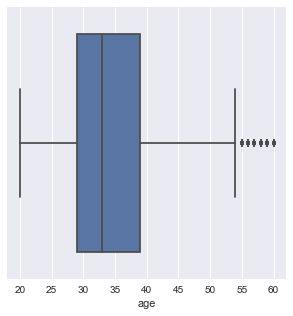

In [31]:
sns.boxplot(train['age'])

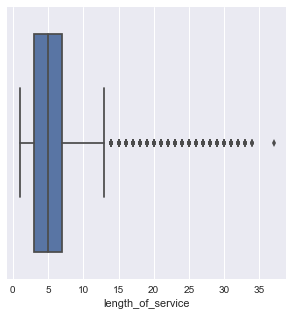

In [32]:
sns.boxplot(train['length_of_service'])

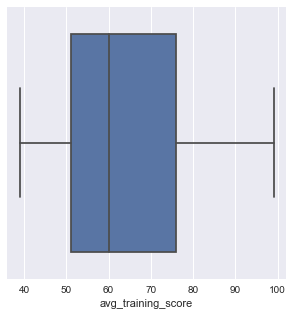

In [33]:
sns.boxplot(train['avg_training_score'])


note in the boxplot below we some plot like age and length of sevice having some dot point above the plot, while average training score has no dot just mention the name now it is called 'OUTLIERS', we dig more later 

Checking the Contineous Variable plot we use Histogram plot to detect the shape of the data and the Scatter plot to know the Linearity of the data

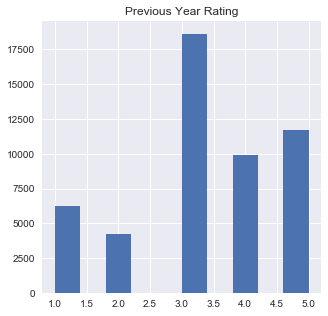

In [34]:
train['previous_year_rating'].hist()
plt.title('Previous Year Rating')

In [35]:
## checking the count
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

## finding missing value and imputation of missing value
we can deal with missing value in many ways
1. Droping the rows or columns with missing value
2. Filling the missing value with mean, median or mode
3. using some predictive imputation
so let check into the data to find the missing value and use a suitable means to fill the missing value

In [36]:
train.isnull().sum() ## checking some of missing value

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

The data we have has 2 missing value from education and previous year rating
i watch a tutorial video that deals with skewness will check it and use mean if it normal in distribution but i will use mean or median for Right or Left skew

In [37]:
## using scipy function
import scipy
from scipy.stats import skew

In [38]:
skewed_feats = train[categorical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in categorical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in categorical features: 



,Skew
awards_won?,6.338740
no_of_trainings,3.445340
is_promoted,2.972258
length_of_service,1.738014
age,1.007404
KPIs_met >80%,0.619892
avg_training_score,0.451896


In [39]:
skew(train['previous_year_rating']) ## using skew

nan

## digging into descriptive analysis
before we fill the missing value

In [40]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## filling the missing value
i will take note of the categorical variable with the higheste education and previous year rating with the median

In [41]:
train['education'].fillna(train['education'].value_counts().index[0], inplace=True) # make note the value count index code is to make with the most occurent 

In [42]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(value=3.0)

In [43]:
#checking the data again
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## no more missing value we digging to the coversion
The next thing to think of is that our machine learning model will not take the input of object variable
backing to the statistics way knows as measurement level of data **Norminal**, **Ordinal** and **Scale**

1.**Norminal** scale has no meaningful ranking for qualitative data

2.**Ordinal** scale has meaningful ranking for qualitative data

3.**Scale** for contineous data

so the datatype with norminal will be with dummies and ordinal using map on label encoder on the data

Note: Domain Knowledge is important in dealing with or make futher research with data you are playing with

In [44]:
train.dtypes[train.dtypes == 'object'].index

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [45]:
train['department'].value_counts() # the value count

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [46]:
departments = pd.get_dummies(train['department']) ## dummies the department

In [47]:
genders = pd.get_dummies(train['gender'])

In [48]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [49]:
train['recruitment_channel'] = [1 if values == 'other' else 0 for values in train['recruitment_channel']]

In [50]:
train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [51]:
order = ["Below Secondary", "Bachelor's", "Master's & above"]

In [52]:
train['education'] = train['education'].map(lambda x: order.index(x))

In [53]:
#train['education'] = train['education'].astype('category')

In [54]:
#train['education'] = train['education'].cat.codes ## Label encoder

In [55]:
train['education'].value_counts()

1    39078
2    14925
0      805
Name: education, dtype: int64

In [56]:
train = pd.concat([train, departments, genders], axis=1)

In [57]:
train.head(1).T

,0
employee_id,65438
department,Sales & Marketing
region,region_7
education,2
gender,f
recruitment_channel,0
no_of_trainings,1
age,35
previous_year_rating,5
length_of_service,8


Note have transofrm all datatypes to numerical value i did not deals with the region due to functionality that probably it will not be involve in our model just saying never to be certain looking at our datset we have 2 differnt identical things one is object other is the dummy variable we drop the unneccessary one later

## Droping the Features we will not be taking to the model

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 25 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null int64
gender                  54808 non-null object
recruitment_channel     54808 non-null int64
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
Analytics               54808 non-null uint8
Finance                 54808 non-null uint8
HR                      54808 non-null uint8
Legal                   54808 non-null uint8
Operations              54808 non-null uint8
Procurement             54808 n

In [59]:
train['employee_id'].nunique()

54808

In [60]:
train.drop(['employee_id', 'gender', 'department', 'region'], axis=1, inplace=True)

## checking the descriptive analysis and some little useful exploration before moving on

In [61]:
train.describe()

,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.257627,0.555503,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170,...,0.046271,0.044118,0.018957,0.207050,0.130236,0.018227,0.307254,0.130236,0.297621,0.702379
std,0.469717,0.496914,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137,...,0.210072,0.205358,0.136375,0.405195,0.336566,0.133774,0.461360,0.336566,0.457216,0.457216
min,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE52125DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE54F71748>]], dtype=object)

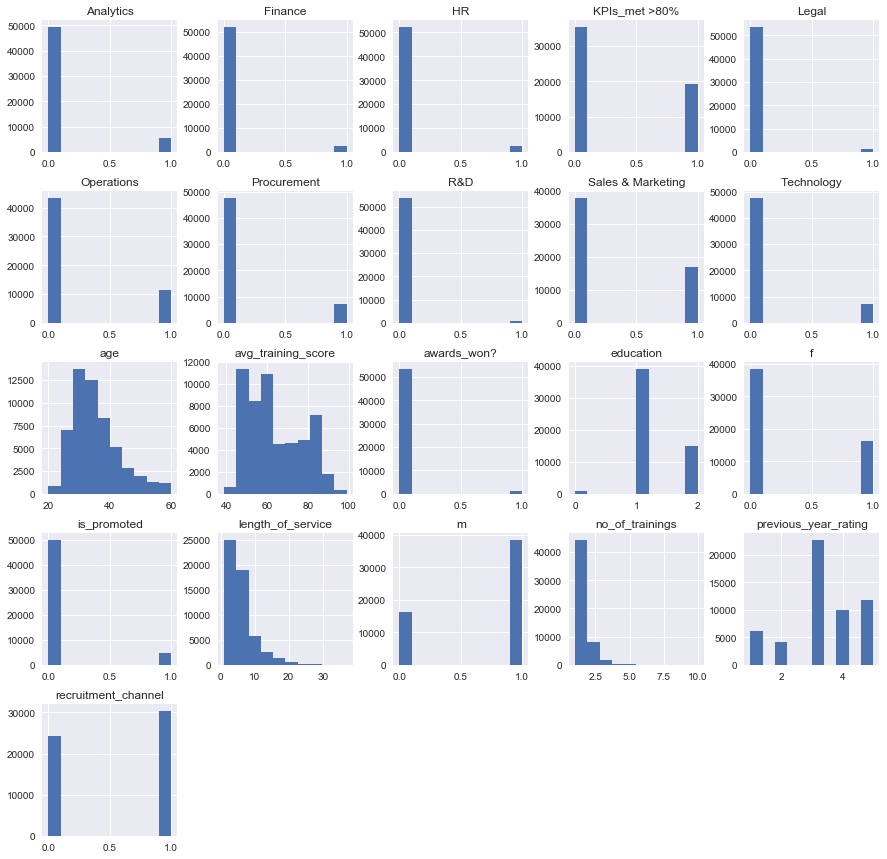

In [62]:
train.hist(figsize=(15, 15))

The histogram plot above is for some little exploration of the distribution we are having dont take not of **0-1** plot.

we have to look into **Age**, **Length_of_service**, **no_of_trainings** and **avg_training**

## doing some little data cleaning

In [63]:
print(train['age'].max(), train['age'].min())

60 20


In [64]:
train['age'].corr(train['is_promoted'])

-0.017165891678929884

In [65]:
train['length_of_service'].max(), train['length_of_service'].min()

(37, 1)

In [66]:
## creating band for age into 5 categories 
#def band(age):
    #if age == 20:
        #return 0
    #elif age <= 21 or age == 30:
        #return 1
    #elif age <= 31 or age == 40:
        #return 2
   # elif age <= 41 or age == 50:
        #return 3
   ## else:
      ##  return 4##W

In [67]:
#train['age'] = train['age'].apply(band)

## FEATURE ENGINEERING AND SELECTION

we have to check feature correlation in our training data

In [68]:
sns.set(rc={'figure.figsize':(15,15)})

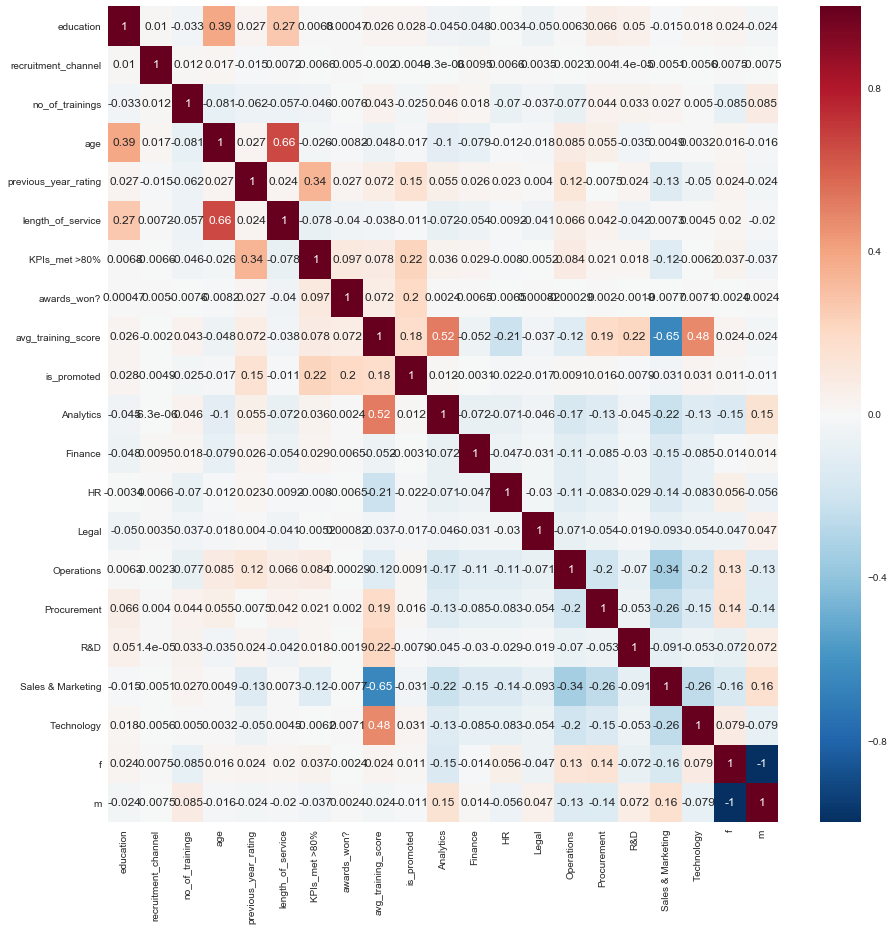

In [69]:

sns.heatmap(train.corr(), annot=True)

let make some little feature engineering from the data

In [70]:
train['experience'] = train['age'] * train['length_of_service']

In [71]:
train['level'] = train['education'] * train['age']

In [72]:
train['impact'] = train['experience'] * train['level']

In [73]:
train['kpi_avg'] = train['KPIs_met >80%'] * train['previous_year_rating']

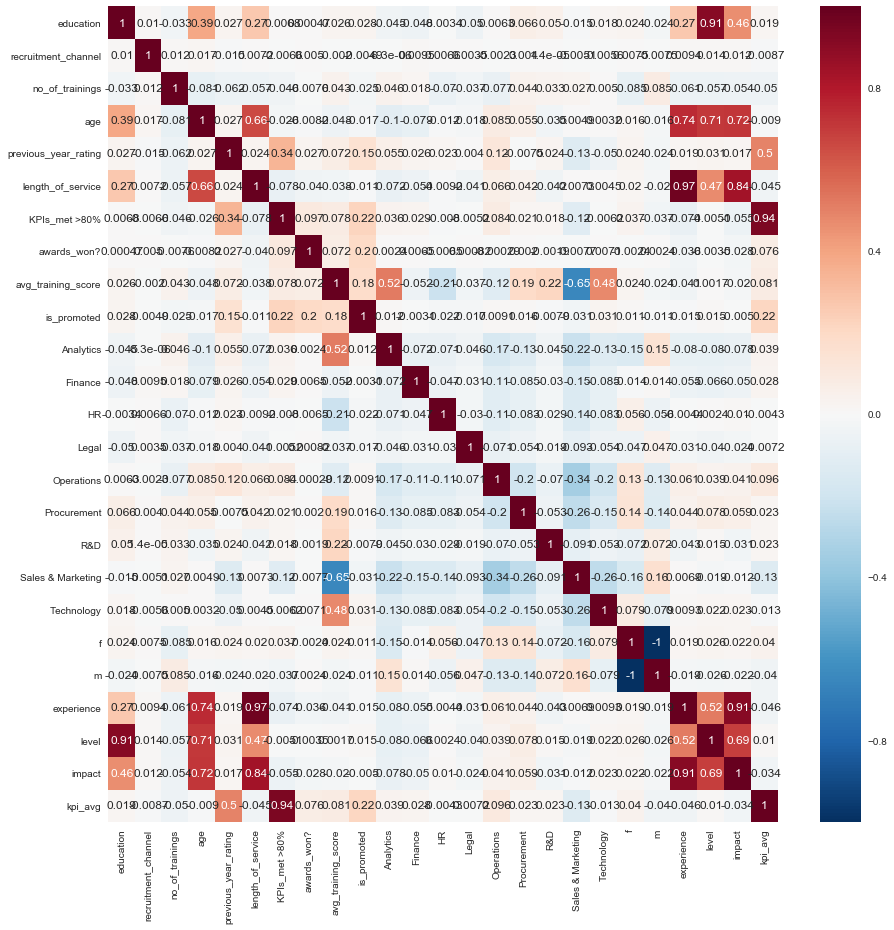

In [74]:
sns.heatmap(train.corr(), annot=True)

## building algorithm

In [75]:
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

In [76]:
# Create random forest classifier
clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=40, random_state=12345, n_jobs=-1, max_features='auto', oob_score=True)
#clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,max_depth=15,random_state=100,)

In [77]:
from sklearn.ensemble import BaggingClassifier
#bg = BaggingClassifier(clf,  n_estimators=500, n_jobs=-1, random_state=12345)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

In [79]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=True,
            random_state=12345, verbose=0, warm_start=False)

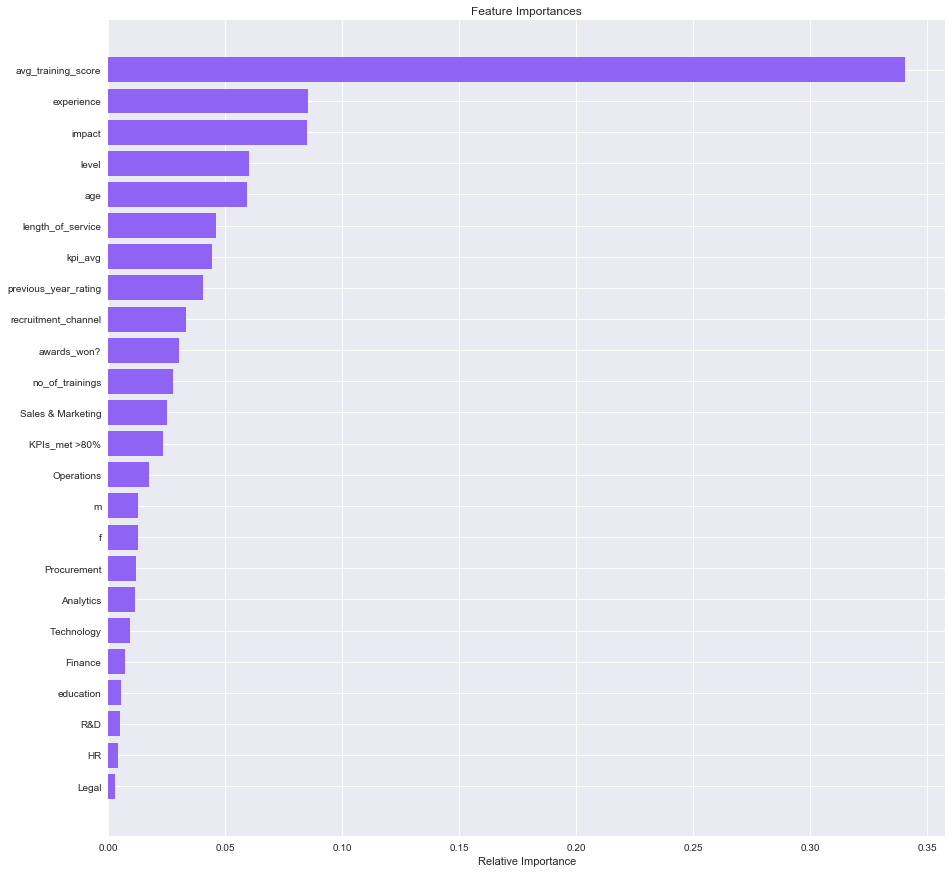

In [80]:
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']
features = X.columns.values
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [81]:
predict = clf.predict(X)

In [82]:
print(roc_auc_score(predict, y_test))
print(accuracy_score(predict, y_test))
print(f1_score(predict, y_test))
print(confusion_matrix(predict, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [54808, 21924]

In [ ]:
print(roc_auc_score(predict, y))
print(accuracy_score(predict, y))
print(f1_score(predict, y))
print(confusion_matrix(predict, y))

## processing test set

In [ ]:
test.head()

In [ ]:
#test.isnull().sum()

Filling test missing value

In [ ]:
test['education'].fillna(test['education'].value_counts().index[0], inplace=True) # make note the value count index code is to make with the most occurent
test['previous_year_rating'] = test['previous_year_rating'].fillna(value=3.0)

Coversion of the categorical data

In [ ]:
departments = pd.get_dummies(test['department']) ## dummies the department
genders = pd.get_dummies(test['gender'])
test['recruitment_channel'] = [1 if values == 'other' else 0 for values in test['recruitment_channel']]
test['education'] = test['education'].map(lambda x: order.index(x))
test = pd.concat([test, departments, genders], axis=1)

In [ ]:
test['experience'] = test['age'] * test['length_of_service']
test['level'] = test['education'] * test['age']
test['impact'] = test['experience'] * test['level']

In [ ]:
test['kpi_avg'] = test['KPIs_met >80%'] * test['previous_year_rating']

## droping Value

In [ ]:
test.drop(['gender', 'department', 'region'], axis=1, inplace=True)

## testing with training set

In [ ]:
#test.drop("employee_id", axis=1)

In [ ]:
X_test = test.drop("employee_id", axis=1)
test_set_predictions = clf.predict(X_test)

In [ ]:
d = {"employee_id": test["employee_id"], 'is_promoted': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[["employee_id",'is_promoted']]

In [ ]:
df_predictions.head()

In [ ]:
df_predictions.to_csv('hr.csv', index=False)